<a href="https://colab.research.google.com/github/sanjay7178/WeedsBostonTrain/blob/main/Boston_RESNET_final_notebook_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from keras.applications.vgg16 import VGG16
# resnet 50
# from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# https://drive.google.com/file/d/13biLIIaftu-e2N5LIa8FdEYuTr6xNwh_/view?usp=share_link
!wget wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13biLIIaftu-e2N5LIa8FdEYuTr6xNwh_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13biLIIaftu-e2N5LIa8FdEYuTr6xNwh_" -O 'Student Projects.zip' && rm -rf /tmp/cookies.txt

--2023-04-16 11:14:51--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-04-16 11:14:51--  https://docs.google.com/uc?export=download&confirm=t&id=13biLIIaftu-e2N5LIa8FdEYuTr6xNwh_
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.101, 172.217.204.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s8rghmjthklq32siroila460henjsvso/1681643625000/02257514593413773851/*/13biLIIaftu-e2N5LIa8FdEYuTr6xNwh_?e=download&uuid=8d7b4c50-3bf1-47df-b499-f658f6306204 [following]
--2023-04-16 11:14:51--  https://doc-08-b8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/s8rghmjthklq32siroila460henjsvso/1681643625000/02257514593413773851/*/13biLIIaftu-e2N5LIa8FdEYuTr6xNwh_?e=download&u

In [ ]:
!unzip '/content/Student Projects.zip'

In [4]:
!pwd

/content


visualizing data
generate dataset for training

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
!pip install  split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import splitfolders
splitfolders.ratio("Student Projects", output="output9",
    seed=1337, ratio=(.7, .2,.1), group_prefix=None, move=False) # default values

Copying files: 342 files [00:00, 2987.85 files/s]


In [9]:
!ls 'output9/train'

'CELOSIA ARGENTEA L'  'CROWFOOT GRASS'	'PURPLE CHLORIS'


In [10]:
image_size = [224, 224, 3] # fix image size

In [4]:
!ls

 drive	       output4	     output8		'Student Projects (2).zip'
 output        output4.zip   output.zip		'Student Projects.zip'
 output1       output5	     sample_data
 output1.zip   output7	    'Student Projects'


In [12]:
train_dir = 'output9/train' #training dataset folder
val_dir = 'output9/val' #testing dataset folder

In [6]:
train_data_gen = ImageDataGenerator(rescale=1. / 225)
val_data_gen = ImageDataGenerator(rescale=1. / 225 )

##Augmentation

In [13]:
train_data_gen = ImageDataGenerator(
    rotation_range=20,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
val_data_gen  = ImageDataGenerator(
    rotation_range=20,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [14]:
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(120,120), class_mode='categorical', batch_size=64)
val_data = val_data_gen.flow_from_directory(val_dir, target_size=(120,120), class_mode='categorical', batch_size=64)

Found 238 images belonging to 3 classes.
Found 67 images belonging to 3 classes.


building deep learning model using pre trained weights 

In [15]:
from keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.applications import EfficientNetB0

In [16]:
mbnet = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))


In [17]:
mbnet.trainable=True
for layer in mbnet.layers:
    layer.trainable = False

In [18]:
mbnet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [19]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten

In [20]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

In [21]:
model = Sequential([
    mbnet,
    GlobalAveragePooling2D(),
    Dense(200, activation='relu'),
    #  BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    Dense(3, activation='softmax')

    # GlobalAveragePooling2D(),
    # BatchNormalization(),
    # Dense(256,activation='relu'),
    # BatchNormalization(),
    # Dense(200,activation='relu'),
    # BatchNormalization(),
    # Dense(3,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 200)               256200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                                 
Total params: 2,514,787
Trainable params: 256,803
Non-tr

In [23]:
from keras.optimizers import Adam

In [24]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    # optimizer ='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [103]:
from PIL import Image


In [25]:
history = model.fit(
    train_data, 
    validation_data=val_data, 
    epochs=50,
    batch_size=128, 
)

Epoch 1/50
4/4 [==============================] - 12s 2s/step - loss: 1.2836 - accuracy: 0.4958 - val_loss: 0.9515 - val_accuracy: 0.5970
Epoch 2/50
4/4 [==============================] - 4s 1s/step - loss: 0.8767 - accuracy: 0.6891 - val_loss: 0.4869 - val_accuracy: 0.8209
Epoch 3/50
4/4 [==============================] - 5s 2s/step - loss: 0.5717 - accuracy: 0.7857 - val_loss: 0.8165 - val_accuracy: 0.6866
Epoch 4/50
4/4 [==============================] - 4s 1s/step - loss: 0.4506 - accuracy: 0.8361 - val_loss: 0.4090 - val_accuracy: 0.8657
Epoch 5/50
4/4 [==============================] - 4s 964ms/step - loss: 0.3413 - accuracy: 0.8824 - val_loss: 0.4366 - val_accuracy: 0.8507
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.2552 - accuracy: 0.8992 - val_loss: 0.4330 - val_accuracy: 0.8209
Epoch 7/50
4/4 [==============================] - 4s 1s/step - loss: 0.2364 - accuracy: 0.9076 - val_loss: 0.4406 - val_accuracy: 0.8657
Epoch 8/50
4/4 [=====================

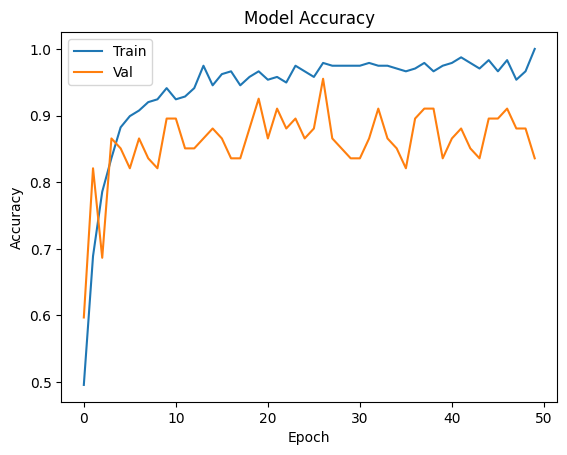

In [26]:
# draw graph for train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

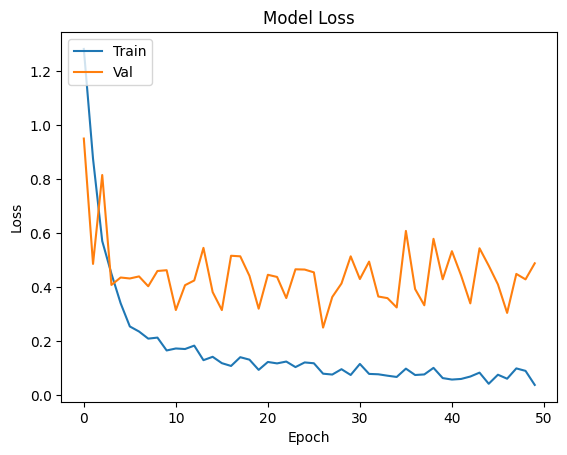

In [27]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [28]:
import sys
from PIL import Image
sys.modules['Image'] = Image

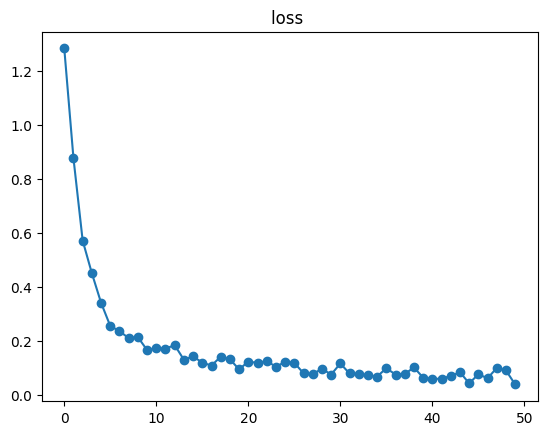

In [29]:
plt.title('loss ')
plt.plot(history.history['loss'], marker='o')

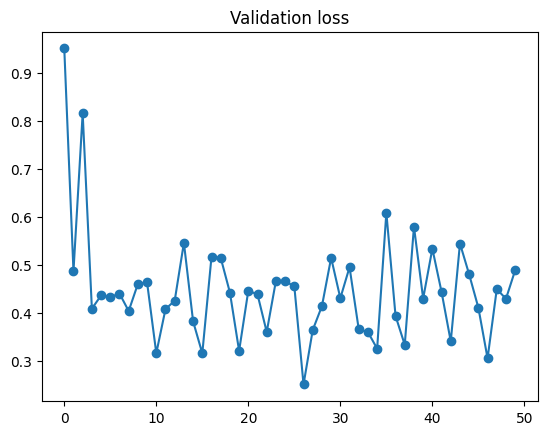

In [30]:
plt.title('Validation loss')
plt.plot(history.history['val_loss'], marker = 'o')

building a custom deep learning model 

In [42]:
model.save('/content/drive/MyDrive/resent weed detection/mbnet_epochs_50(1).h5')
model.save('mbnet_epochs_50(1).h5')


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# set the path to the test data
test_data_path = 'output9/test/'

# set the batch size
batch_size = 32

# create a data generator for the test data
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
        test_data_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

# load the MobileNet model
model = load_model('/content/drive/MyDrive/resent weed detection/mbnet_epochs_40.h5')

# evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test accuracy:', test_accuracy)


Found 37 images belonging to 3 classes.


2/2 [==============================] - 6s 1s/step - loss: 0.4508 - accuracy: 0.8378
Test accuracy: 0.837837815284729


##PRINCIPAL COMPONENT ANALYSIS(PCA)

Found 238 images belonging to 3 classes.


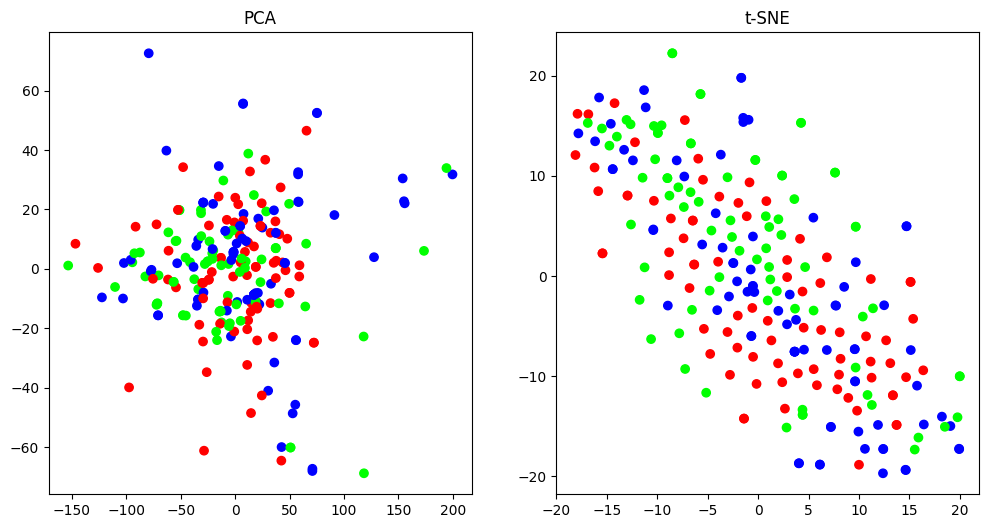

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# set the path to the train data
train_data_path = 'output9/train'

# set the batch size
batch_size = 32

# create a data generator for the train data
train_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
        train_data_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

# get the training data and labels
train_data = []
train_labels = []

for i in range(len(train_generator)):
    batch_data, batch_labels = train_generator[i]
    train_data.append(batch_data)
    train_labels.append(batch_labels)

train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)

# flatten the training data
train_data_flattened = train_data.reshape(train_data.shape[0], -1)

# apply PCA to reduce the dimensionality of the training data
pca = PCA(n_components=2)
train_data_pca = pca.fit_transform(train_data_flattened)

# apply t-SNE to further reduce the dimensionality of the training data
tsne = TSNE(n_components=2)
train_data_tsne = tsne.fit_transform(train_data_flattened)

# plot the results using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c=train_labels)
plt.title('PCA')

plt.subplot(1, 2, 2)
plt.scatter(train_data_tsne[:, 0], train_data_tsne[:, 1], c=train_labels)
plt.title('t-SNE')

plt.show()


In [39]:
import os
labels = os.listdir('output9/train')
print(labels)

['CROWFOOT GRASS', 'PURPLE CHLORIS', 'CELOSIA ARGENTEA L']


In [43]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# set the path to the model file
model_path = '/content/drive/MyDrive/resent weed detection/vgg16_epochs_25.h5'

# load the model
model = load_model(model_path)

# set the input image size
input_size = (224, 224)

# set the input mean and standard deviation for normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# set the input scale factor
scale_factor = 1/255.0

# set the labels for the classes
class_labels = labels

# set the path to the input image
# sample test image --> CROWFOOT GRASS
!wget https://assets-news.housing.com/news/wp-content/uploads/2022/10/10162858/shutterstock_665072416.jpg
image_path = 'shutterstock_665072416.jpg'

# load the input image and resize it
image = cv2.imread(image_path)
image = cv2.resize(image, input_size)

# convert the image to a numpy array and normalize it
image = np.asarray(image, dtype=np.float32)
image /= 255.0
image -= mean
image /= std

# add a batch dimension to the input image
image = np.expand_dims(image, axis=0)

# run the inference on the input image
prediction = model.predict(image)

# get the predicted class label
predicted_class = np.argmax(prediction)

# get the predicted class probability
predicted_prob = prediction[0][predicted_class]

# print the predicted class label and probability
print('Predicted class:', class_labels[predicted_class])
print('Predicted probability:', predicted_prob)


--2023-04-16 11:37:15--  https://assets-news.housing.com/news/wp-content/uploads/2022/10/10162858/shutterstock_665072416.jpg
Resolving assets-news.housing.com (assets-news.housing.com)... 18.64.174.24, 18.64.174.74, 18.64.174.114, ...
Connecting to assets-news.housing.com (assets-news.housing.com)|18.64.174.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573147 (560K) [image/jpeg]
Saving to: ‘shutterstock_665072416.jpg.1’

shutterstock_665072 100%[===================>] 559.71K  --.-KB/s    in 0.08s   

2023-04-16 11:37:16 (7.05 MB/s) - ‘shutterstock_665072416.jpg.1’ saved [573147/573147]

1/1 [==============================] - 1s 764ms/step
Predicted class: PURPLE CHLORIS
Predicted probability: 0.9849283
